# Frequency Analysis

## Import Stuff

In [90]:
# Fourier transform source:
# https://www.alphabold.com/fourier-transform-in-python-vibration-analysis/

import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft
import re

## Parse the Data
Also define constants that may help later

In [91]:
times = []
acc_pitch = []
acc_roll = []

# Capture the two numbers from each line
regex = re.compile("^Time:(.*),AccPitch:(.*), AccRoll:(.*).*$")
with open("screenshots/sensor-tap-angles.txt") as f:
  lines = f.readlines()
  for line in lines:
    matches = regex.match(line)
    times.append(int(matches.group(1)))
    acc_pitch.append(float(matches.group(2)))
    acc_roll.append(float(matches.group(3)))

N = len(acc_pitch) # the number of samples we have
times = [t-times[0] for t in times]
avg_time_per_sample = sum([t - s for s, t in zip(times, times[1:])]) / (N-1)
sample_rate = 1000 / (avg_time_per_sample) # convert to Hz
print(f"Sample rate: {sample_rate} Hz")


Sample rate: 164.93886230728336 Hz


## Plot Pitch (Time domain)

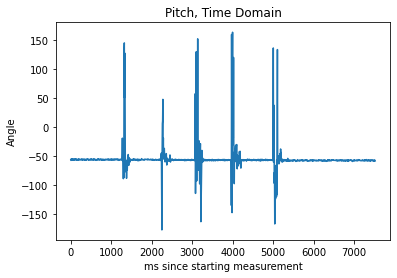

In [92]:
plt.plot(times, acc_pitch)
plt.title("Pitch, Time Domain")
plt.xlabel("ms since starting measurement")
plt.ylabel("Angle")
plt.show()

## Compute Fourier Transform (Pitch)

In [93]:
max_freq = sample_rate // 2 # By the Nyquist-Shannon sampling theorem
print(f"Max Frequency: {max_freq} Hz")
freq = np.linspace(0.0, max_freq, N)
freq_pitch = fft(acc_pitch)
y = 2/N * np.abs(freq_pitch[0:N])

Max Frequency: 82.0 Hz


## Plot Pitch (frequency domain)
Behavior is hard to see if Y-axis is autoscaled, so I limited it to see noise better.

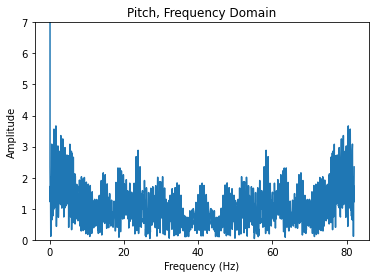

In [94]:
plt.plot(freq, y)
plt.title("Pitch, Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
ax = plt.gca()
# ax.set_xlim([0,1])
ax.set_ylim([0,7])
plt.show()

## Plot Roll (time domain)

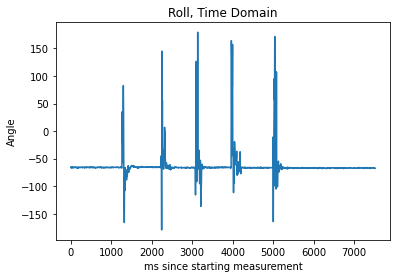

In [95]:
plt.plot(times, acc_roll)
plt.title("Roll, Time Domain")
plt.xlabel("ms since starting measurement")
plt.ylabel("Angle")
plt.show()

## Computer Fourier Transform (Roll)

In [96]:
freq_roll = fft(acc_roll)
y = 2/N * np.abs(freq_roll[0:N])

## Plot Roll (Frequency Domain)
Behavior is hard to see if Y-axis is autoscaled, so I limited it to see noise better.

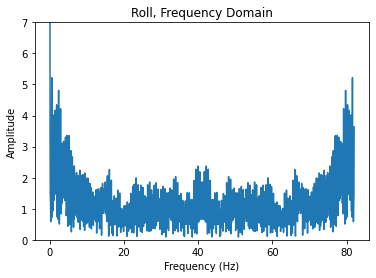

In [97]:
plt.plot(freq, y)
plt.title("Roll, Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
ax = plt.gca()
# ax.set_xlim([0,1])
ax.set_ylim([0,7])
plt.show()

## Calculate Filter Constants

In [99]:
pitch_cutoff_hz = 1/60
roll_cuttoff_hz = 1/65

def get_constant(T, cutoff):
  RC = 1 / (2 * np.pi * cutoff) # because f_c = 1/(2*pi*R*C)
  return T / (T + RC)

T = sample_rate

print(f"Pitch Constant:{get_constant(T, pitch_cutoff_hz)}")

print(f"Roll Constant: {get_constant(T, roll_cuttoff_hz)}")

Pitch Constant:0.9452725236709003
Roll Constant: 0.9409810637631315
